In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [3]:
df=pd.read_csv("../input/k-mean/Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
#Considering only numerical data
df.data = df.iloc[:,1:]
df.data.head()
# Converting into numpy array\n",
df = df.data.values
df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


array([[    3, 12669,  9656, ...,   214,  2674,  1338],
       [    3,  7057,  9810, ...,  1762,  3293,  1776],
       [    3,  6353,  8808, ...,  2405,  3516,  7844],
       ...,
       [    3, 14531, 15488, ...,   437, 14841,  1867],
       [    3, 10290,  1981, ...,  1038,   168,  2125],
       [    3,  2787,  1698, ...,    65,   477,    52]])

In [7]:
# Normalizing the numerical data \n",
df_normal = scale(df)
df_normal

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [9]:
pca = PCA()
pca_values = pca.fit_transform(df_normal)

In [10]:
pca_values

array([[ 0.20546957, -0.26875551, -0.67559708, ..., -0.40632831,
         0.48933223, -0.00757214],
       [ 0.44622842, -0.29412352, -0.59155973, ..., -0.09463048,
         0.35863147,  0.05439762],
       [ 0.82413279,  0.8477597 , -0.53848097, ..., -1.15009968,
        -0.38360042, -0.27768696],
       ...,
       [ 3.47631027, -1.010138  , -0.6245638 , ...,  0.09224959,
        -0.54524227, -0.0855234 ],
       [-0.90548561,  0.00749195, -0.64520544, ..., -0.43889478,
        -0.09937193, -0.0291131 ],
       [-1.09353047, -0.82316556, -0.64399465, ..., -0.02634482,
         0.10237464,  0.02878898]])

In [13]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(df_normal)
pca_values

array([[ 0.20546957, -0.26875551, -0.67559708, -0.07531668, -0.40632831,
         0.48933223],
       [ 0.44622842, -0.29412352, -0.59155973,  0.3738107 , -0.09463048,
         0.35863147],
       [ 0.82413279,  0.8477597 , -0.53848097,  1.59706184, -1.15009968,
        -0.38360042],
       ...,
       [ 3.47631027, -1.010138  , -0.6245638 , -0.66349004,  0.09224959,
        -0.54524227],
       [-0.90548561,  0.00749195, -0.64520544,  0.32317169, -0.43889478,
        -0.09937193],
       [-1.09353047, -0.82316556, -0.64399465,  0.36207254, -0.02634482,
         0.10237464]])

In [14]:
# The amount of variance that each PCA explains is \n",
var = pca.explained_variance_ratio_
var

array([0.37795265, 0.24356898, 0.14375576, 0.10543601, 0.07949434,
       0.04079639])

In [16]:
# Cumulative variance \n",
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([37.8 , 62.16, 76.54, 87.08, 95.03, 99.11])

In [17]:
pca.components_

array([[ 2.05690181e-02,  4.36834460e-02,  5.45171062e-01,
         5.78949643e-01,  5.12486019e-02,  5.48207659e-01,
         2.49231700e-01],
       [ 5.83252985e-02,  5.28766954e-01,  8.23342670e-02,
        -1.47305448e-01,  6.07641595e-01, -2.56372374e-01,
         5.03558080e-01],
       [-9.86181604e-01, -6.88203033e-02,  7.07125304e-04,
         1.05440202e-02,  1.49286109e-01,  1.01145237e-02,
         1.44667411e-02],
       [ 8.47401397e-02, -8.04569548e-01,  6.27275168e-02,
        -1.11676621e-01,  1.54245575e-01, -1.40828673e-01,
         5.34280947e-01],
       [ 1.27650909e-01, -2.50770641e-01, -8.36913574e-02,
         1.01593435e-01,  7.62194119e-01,  1.66705525e-01,
        -5.42921039e-01],
       [-1.20490297e-02, -4.73983691e-02,  8.26815676e-01,
        -3.15128999e-01, -2.97000191e-02, -3.39933028e-01,
        -3.13434543e-01]])

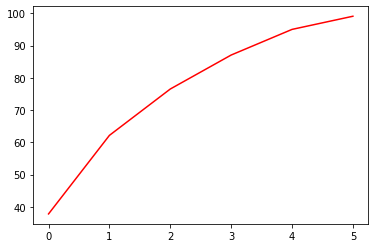

In [20]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [21]:
pca_values[:,0:1]

array([[ 2.05469565e-01],
       [ 4.46228421e-01],
       [ 8.24132789e-01],
       [-7.66022465e-01],
       [ 1.79955088e-01],
       [-1.44020811e-01],
       [-3.23364798e-01],
       [ 1.52548329e-01],
       [-5.05588799e-01],
       [ 1.60323945e+00],
       [ 6.49301934e-01],
       [-9.15402452e-01],
       [ 1.00483211e+00],
       [ 8.62228035e-01],
       [ 8.57779941e-01],
       [-9.39522663e-01],
       [ 5.68629259e-01],
       [-3.39835216e-01],
       [ 3.29403028e-01],
       [-3.12142388e-01],
       [-3.07252452e-01],
       [-1.10650318e+00],
       [-1.62568357e-01],
       [ 4.70129831e+00],
       [ 1.25838778e+00],
       [-1.42124530e-01],
       [-1.02737156e+00],
       [-1.08508677e+00],
       [ 3.13344016e+00],
       [-7.65675854e-01],
       [ 8.73710542e-02],
       [-7.17419055e-01],
       [-9.49414722e-01],
       [-3.36305947e-01],
       [-1.05747616e+00],
       [ 1.78214104e-01],
       [-1.58007772e-01],
       [ 9.84424646e-01],
       [ 1.5

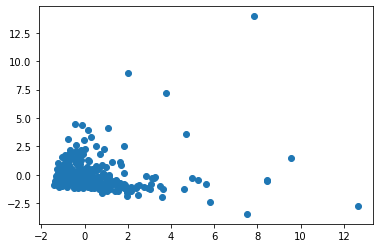

In [22]:
# plot between PCA1 and PCA2 \n",
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]\n",
plt.scatter(x,y)

In [26]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), df['FinalDF'], axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices